In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [4]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [5]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Wafa/Documents/MINIPROJECT/data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [6]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [7]:
# Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# Load VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add new classification layers on top
flatten = Flatten()(vgg_base.output)
dense1 = Dense(512, activation='relu')(flatten)
output = Dense(len(class_names), activation='softmax')(dense1) 

model3 = Model(inputs=vgg_base.input, outputs=output)

# Specify learning rate separately
learning_rate = 0.0001

# Create Adam optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Define the file path for saving model weights
filepath = "model3.weights.h5"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

# List of callbacks
callbacks_list = [checkpoint]

In [10]:
# Now, you can train this model on your dataset
history = model3.fit(training_data, validation_data=validation_data, epochs=20, callbacks=callbacks_list)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5196 - loss: 16.2203
Epoch 1: val_accuracy improved from -inf to 0.83673, saving model to model3.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 8s/step - accuracy: 0.5263 - loss: 16.3590 - val_accuracy: 0.8367 - val_loss: 6.1201
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8100 - loss: 6.6992
Epoch 2: val_accuracy improved from 0.83673 to 0.85714, saving model to model3.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 9s/step - accuracy: 0.8062 - loss: 6.8146 - val_accuracy: 0.8571 - val_loss: 2.8796
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8903 - loss: 2.5494
Epoch 3: val_accuracy improved from 0.85714 to 0.93878, saving model to model3.weights.h5
8/8 ━━━━━━━━━━━━━━━━━━━━ 68s 9s/step - accuracy: 0.8905 - loss: 2.5655 - val_accuracy: 0.9388 - val_loss: 1.1085
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9263 - loss: 1.0556
Epoch 4: val_accuracy did not improve from 0.93878
8/8 ━━━━━━━━━━━━━

In [11]:
# Save model architecture as JSON file
model3_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model3_json)

In [12]:
import matplotlib.pyplot as plt

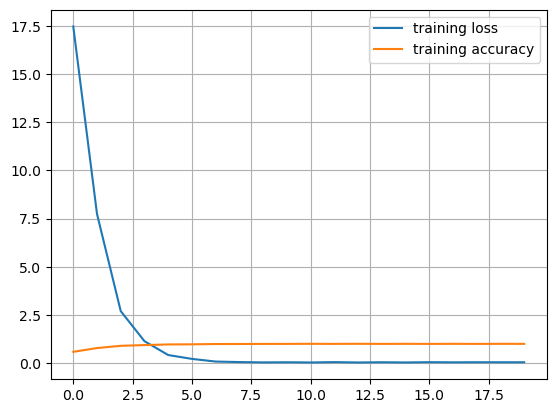

In [13]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

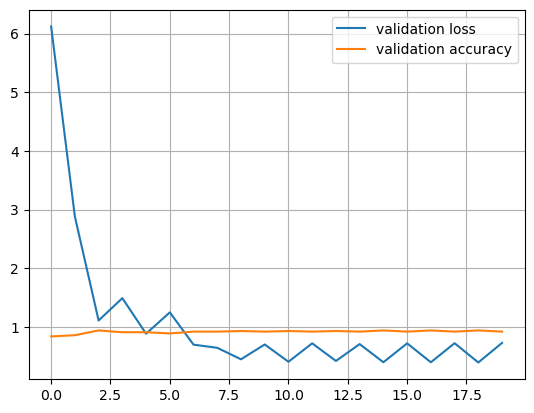

In [14]:
## stats on validation data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


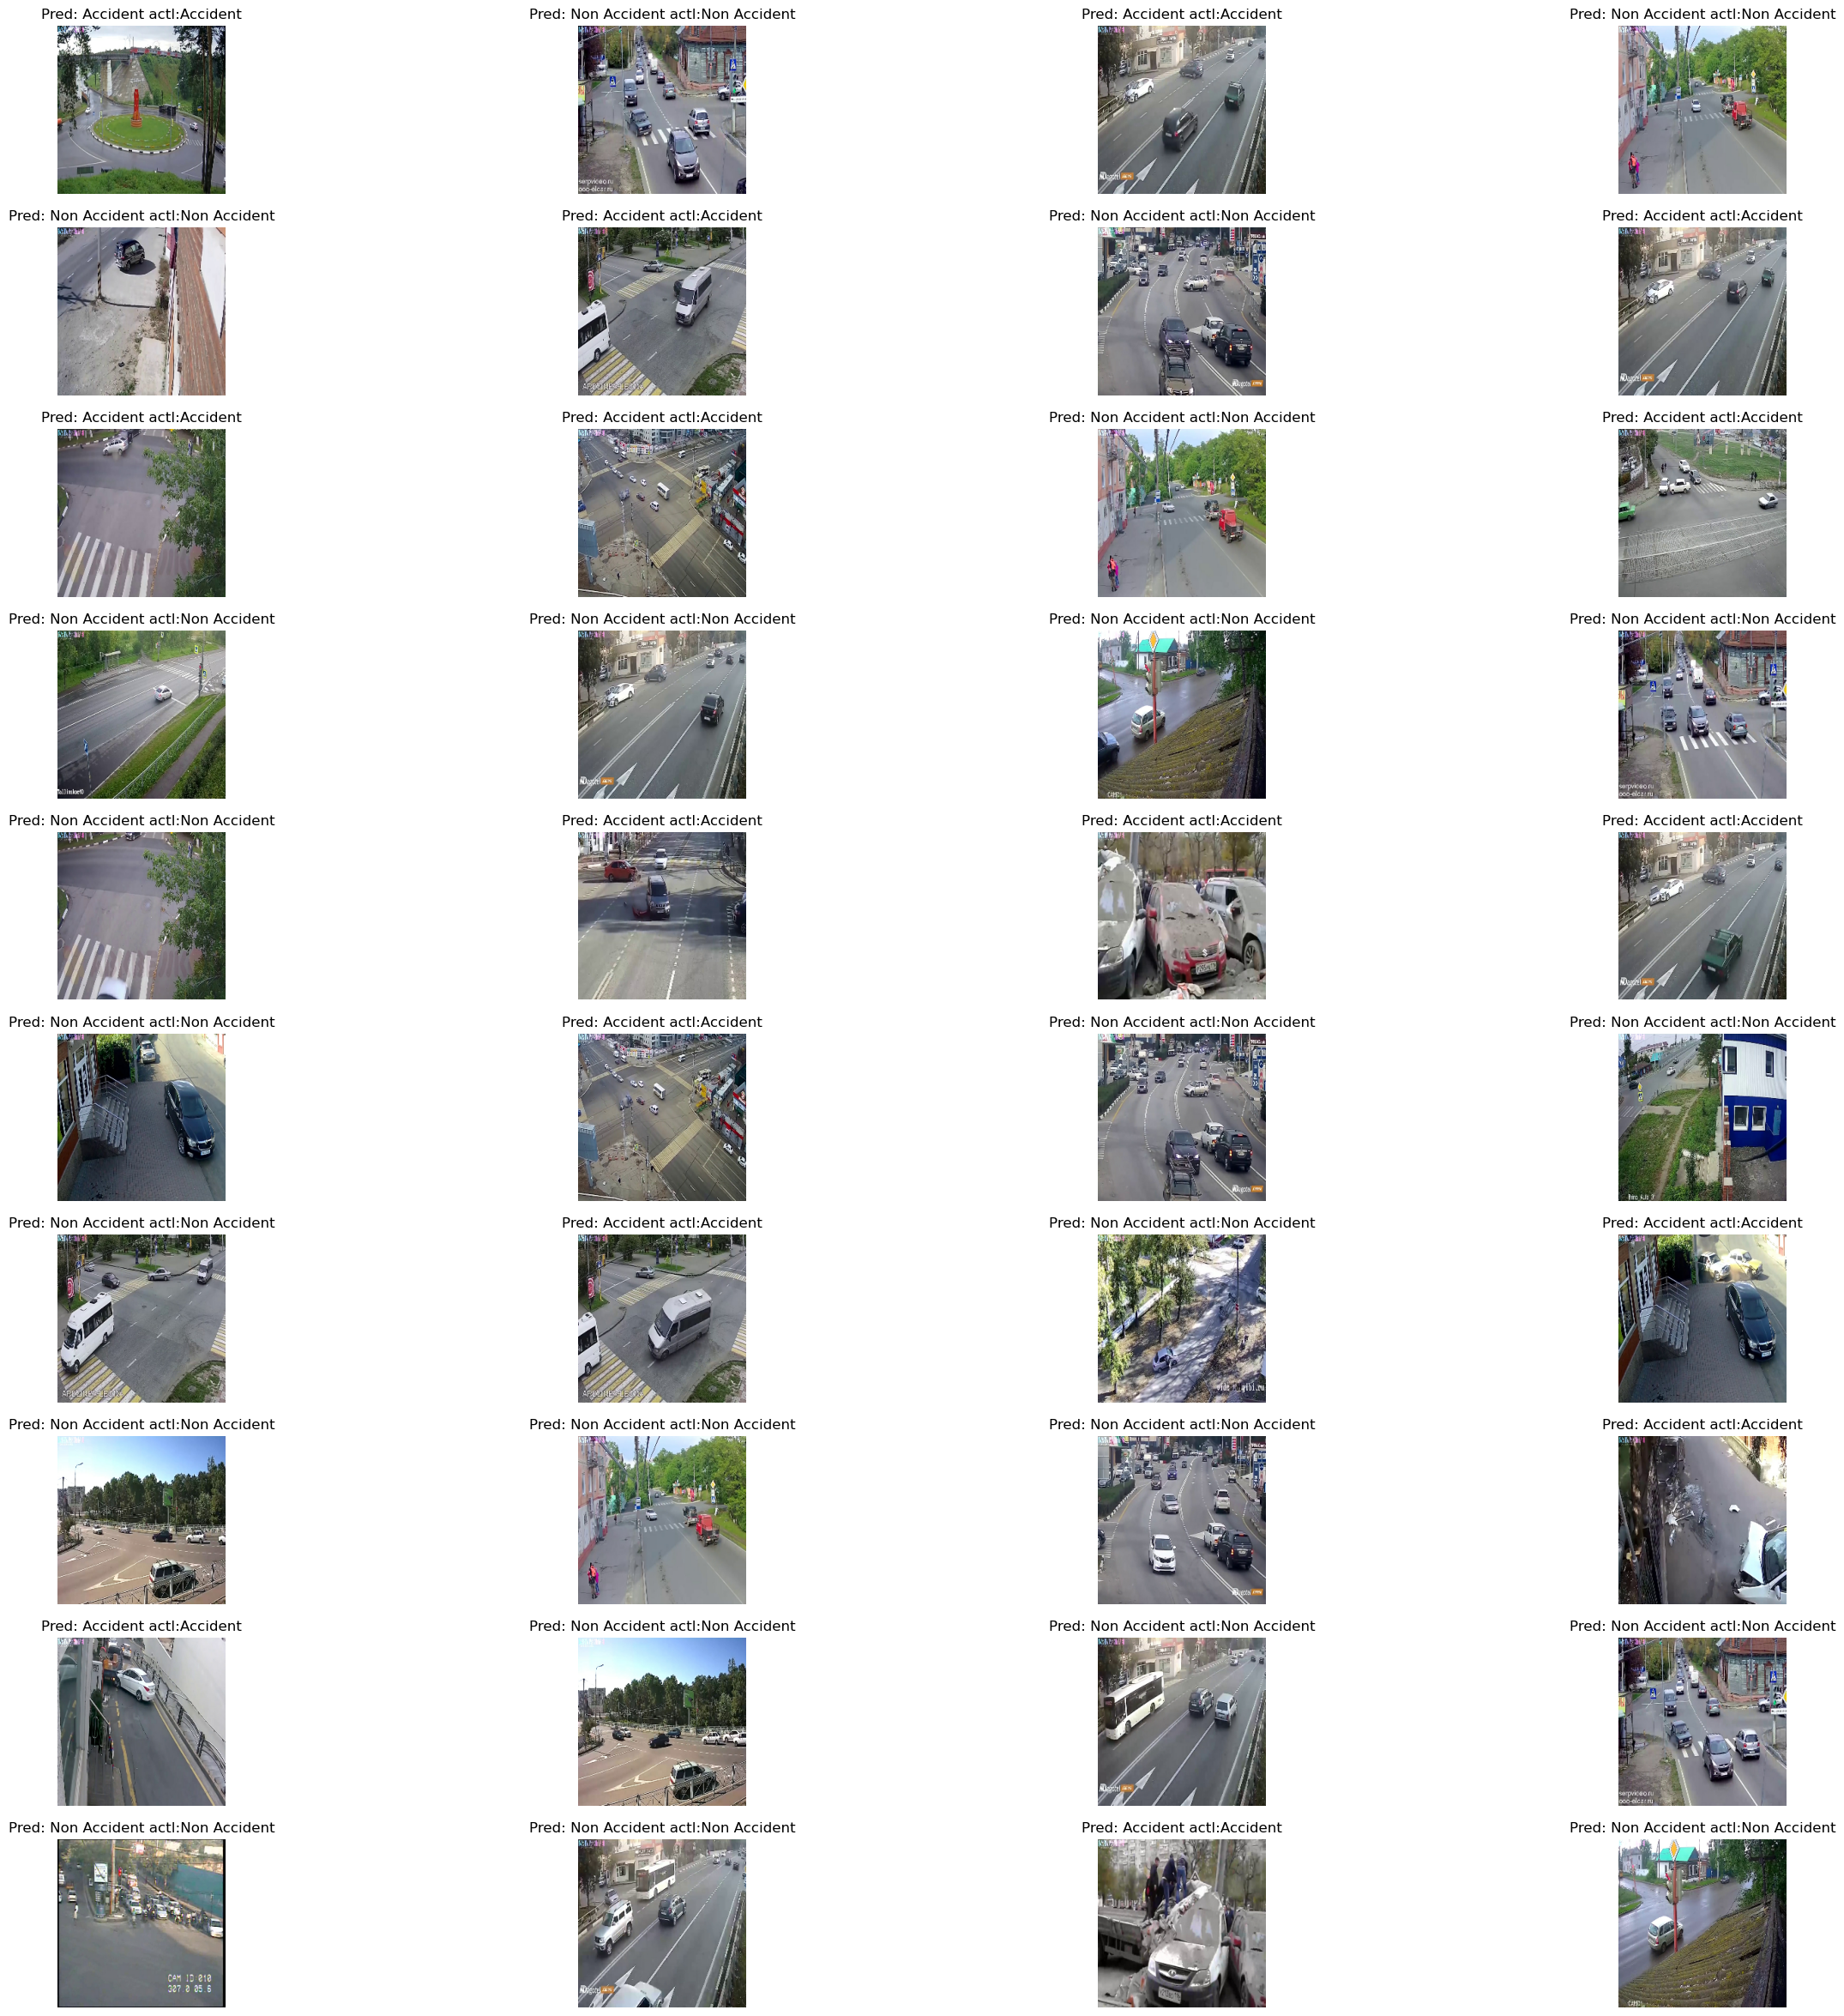

In [15]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model3.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)